### 1. Data agumentation

이미지 증강의 성능 개선을 보자.

In [1]:
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


Saved under cats_and_dogs_filtered.zip


In [2]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
epochs=20
model = create_model()
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
100/100 - 40s - loss: 0.6951 - accuracy: 0.5310 - val_loss: 0.6850 - val_accuracy: 0.5230 - 40s/epoch - 396ms/step
Epoch 2/20
100/100 - 37s - loss: 0.6815 - accuracy: 0.5550 - val_loss: 0.6726 - val_accuracy: 0.5780 - 37s/epoch - 373ms/step
Epoch 3/20
100/100 - 38s - loss: 0.6595 - accuracy: 0.5990 - val_loss: 0.6566 - val_accuracy: 0.6140 - 38s/epoch - 381ms/step
Epoch 4/20
100/100 - 39s - loss: 0.6310 - accuracy: 0.6415 - val_loss: 0.7749 - val_accuracy: 0.5080 - 39s/epoch - 388ms/step
Epoch 5/20
100/100 - 38s - loss: 0.6007 - accuracy: 0.6835 - val_loss: 0.6086 - val_accuracy: 0.6610 - 38s/epoch - 380ms/step
Epoch 6/20
100/100 - 39s - loss: 0.5652 - accuracy: 0.7120 - val_loss: 0.6812 - val_accuracy: 0.6100 - 39s/epoch - 387ms/step
Epoch 7/20
100/100 - 39s - loss: 0.5443 - accuracy: 0.7165 - val_loss: 0.6459 - val_accuracy: 0.6340 - 39s/epoch - 389ms/step
Epoch 8/20
100/100 - 38s - loss: 0.5283 - accuracy: 0.7355 - val_loss: 0.5696 - val_accuracy: 0.7080 - 38s/epoch - 379

In [8]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Val acc')
    plt.title('acc')
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Val loss')
    plt.title('loss')
    plt.legend()
    plt.show()


ImageDataGenerator는 매 epoch마다 이미지 증강을 하여 batch를 생성한다.
즉 1번 학습할 때마다, 이미지 배치가 새로 생성되어 일반성을 더 가져갈 수 있다.

In [10]:

train_datagen = ImageDataGenerator(
    rescale=1./255,         # 픽셀조정
    rotation_range=40,      # 회전
    width_shift_range=0.2,  # 가로이동
    height_shift_range=0.2, # 세로 이동
    shear_range=0.2,        # 일부 영역을 압축, 늘리기    x' = x + m*y
                                                        #y' = n*x + y
    zoom_range=0.2,         # 이미지 확대
    horizontal_flip=True,   # 좌우 반전
    fill_mode = 'nearest')  # 새롭게 생성된 픽셀들을 채우는 방법.

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

model_aug = create_model()
history_aug = model_aug.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 41s - loss: 0.6932 - accuracy: 0.5150 - val_loss: 0.6858 - val_accuracy: 0.5580 - 41s/epoch - 409ms/step
Epoch 2/20
100/100 - 39s - loss: 0.6866 - accuracy: 0.5500 - val_loss: 0.6821 - val_accuracy: 0.5540 - 39s/epoch - 392ms/step
Epoch 3/20
100/100 - 38s - loss: 0.6798 - accuracy: 0.5580 - val_loss: 0.6659 - val_accuracy: 0.6080 - 38s/epoch - 379ms/step
Epoch 4/20
100/100 - 38s - loss: 0.6726 - accuracy: 0.5730 - val_loss: 0.6510 - val_accuracy: 0.6320 - 38s/epoch - 376ms/step
Epoch 5/20
100/100 - 38s - loss: 0.6607 - accuracy: 0.6030 - val_loss: 0.6335 - val_accuracy: 0.6450 - 38s/epoch - 379ms/step
Epoch 6/20
100/100 - 39s - loss: 0.6516 - accuracy: 0.6150 - val_loss: 0.6191 - val_accuracy: 0.6590 - 39s/epoch - 386ms/step
Epoch 7/20
100/100 - 39s - loss: 0.6292 - accuracy: 0.6485 - val_loss: 0.6429 - val_accuracy: 0.5940 - 39s/epoch - 395ms/step
Epoch 8/20
100/100 - 39s - loss: 0

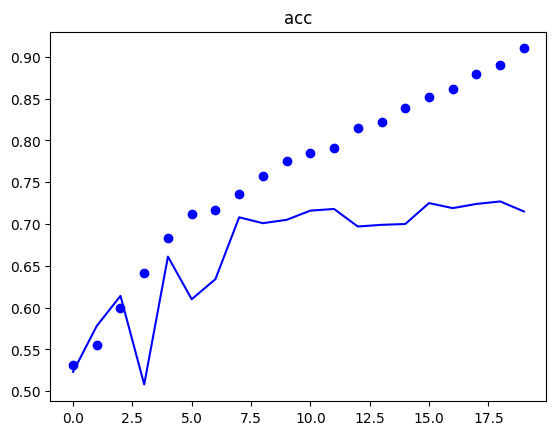

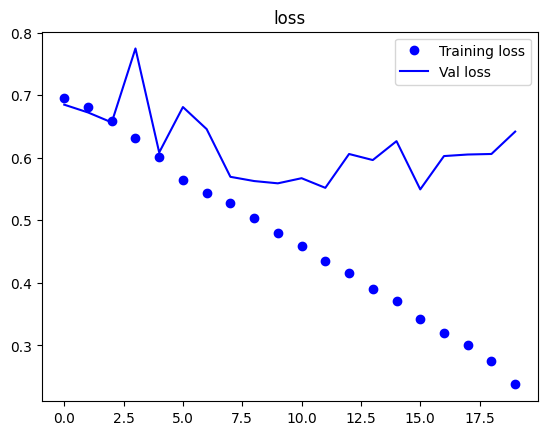

In [11]:
plot_loss_acc(history)

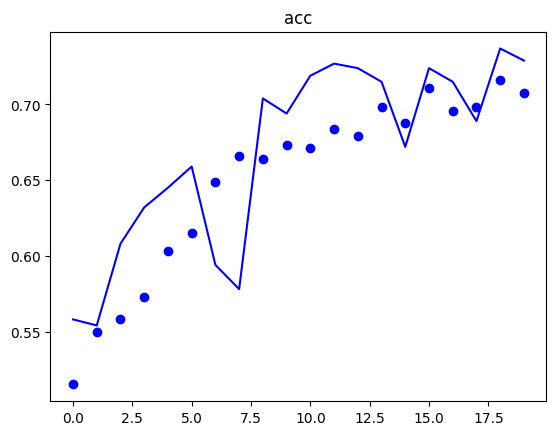

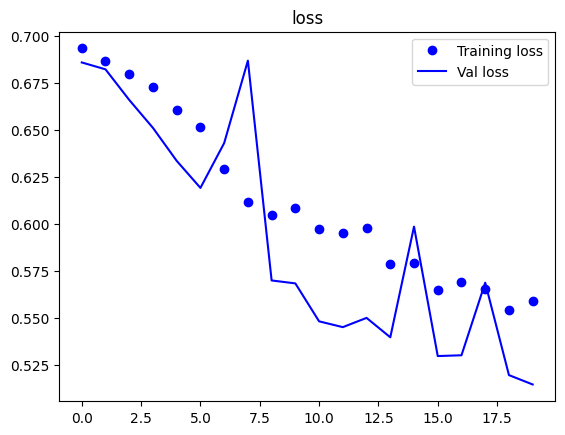

In [12]:
plot_loss_acc(history_aug)

### 2. Tansfer learning

대규모의 데이터셋으로 이미 학습한 모델을 가져와서 뒤에 몇 개의 layer를 